# <center>Programming Exercise 2: Logistic Regression</center>
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

## Logistic Regression

### Import libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import data

In [118]:
data = pd.read_csv('./data/ex2data1.txt', header=None, names=['FirstScore', 'SecondScore', 'isAdmitted'])
m = data.shape[0]

X = pd.DataFrame({"FirstScore": data.FirstScore, "SecondScore": data.SecondScore})
X.insert(0, '', np.ones(m))
y = data.isAdmitted

X.head()

,,FirstScore,SecondScore
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


### Visualizing the data

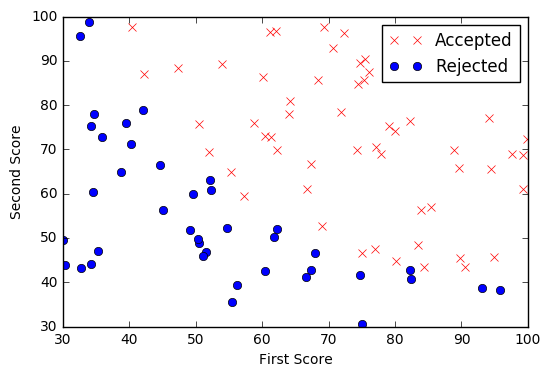

In [119]:
def plotData(X):
    firstColumn = X.iloc[:,1]
    secondColumn = X.iloc[:,2]
    plt.plot(firstColumn[y == 1], secondColumn[y == 1], 'rx', label="Accepted")
    plt.plot(firstColumn[y == 0], secondColumn[y == 0], 'o', label="Rejected")
    plt.xlabel('First Score')
    plt.ylabel('Second Score')
    plt.legend(loc='upper right')
    plt.show()
    
plotData(X)

### Sigmoid Function

In [120]:
import math

# Vectorized Sigmoid functions
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [121]:
print(sigmoid(99999)) # should be as close to 1 as possible
print(sigmoid(-99))   # should be as close to 0 as possible
print(sigmoid(0))     # should be 0.5

1.0
1.01122149261e-43
0.5


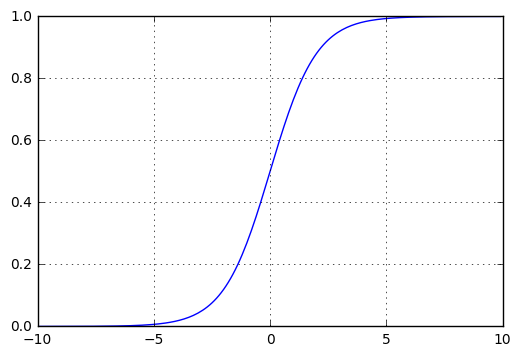

In [122]:
sigmoidTest = np.arange(-10, 10, .1)
# print(np.round(sigmoid(sigmoidTest), 3))
plt.plot(sigmoidTest, sigmoid(sigmoidTest))
plt.grid(True)
plt.show()

### Cost function and gradient

Gradient of the cost is a vector of the same length as θ where the jth element (for j = 0,1,...,n)

Check out the cost function and gradient in [vectorized form](https://github.com/JWarmenhoven/Coursera-Machine-Learning/blob/master/notebooks/Programming%20Exercise%202%20-%20Logistic%20Regression.ipynb)

In [123]:
# Logistic regression hypothesis. 
def h(theta, X):
    return sigmoid(np.dot(X, theta))

def computeCost(theta, X, y):
    m = y.size
    term1 = -np.dot(y.T, np.log(h(theta,X)))
    term2 = -np.dot((1 - y).T, np.log(1 - h(theta,X)))
    J = (term1 +  term2) / m
    return J

In [124]:
def gradient(theta, X, y):
    m = y.size
    differences = h(theta, X) - y
    return (1.0/m) * np.dot(differences.T, X)

In [125]:
initial_theta = np.zeros(X.shape[1])
cost = computeCost(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost) # should be 0.693
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


### Learning parameters optimized
An alternative to OCTAVE's 'fminunc' we'll use some scipy.optimize function, `fmin`. Note `fmin` does not need to be told explicitly the derivative terms. It only needs the cost function, and it minimizes with the "downhill simplex algorithm."

[Link](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html)

In [103]:
from scipy import optimize

def optimizeTheta(theta,X,y):
    result = optimize.fmin(computeCost, x0=theta, args=(X, y), maxiter=400, full_output=True)
    return result[0], result[1]

In [104]:
theta, mincost = optimizeTheta(initial_theta,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [108]:
print(computeCost(theta, X, y)) # compute cost with optimized theta

0.20349770159


### Predict

In [125]:
def predict(theta, X):
    return sigmoid(np.dot(X, theta)) >= 0.5

In [127]:
prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of {:.3f}'.format(prob))
# expect 0.776

For a student with scores 45 and 85, we predict an admission probability of 0.776


## Regularized logistic regression
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assur- ance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected.

### Import data

In [86]:
data = pd.read_csv('./data/ex2data2.txt', header=None)
X = pd.DataFrame({'FirstTest': data.iloc[:,0], 'SecondTest': data.iloc[:,1]})
X.insert(0, '', np.ones(data.shape[0]))
y = data.iloc[:,2]
X.head()

,,FirstTest,SecondTest
0,1.0,0.051267,0.69956
1,1.0,-0.092742,0.68494
2,1.0,-0.213710,0.69225
3,1.0,-0.375000,0.50219
4,1.0,-0.513250,0.46564


### Visualizing the data

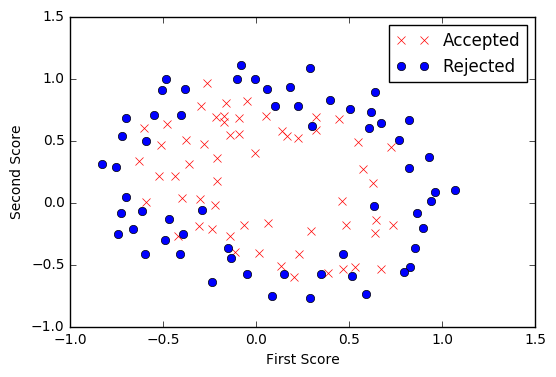

In [87]:
plotData(X)

### Map Features

In [88]:
from pandas import Series

def mapFeature(X, degree=6):
    """
    Feature mapping function to polynomial features

    MAPFEATURE(X, degree) maps the two input features
    to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    """
    quads = Series([X.iloc[0]**(i-j) * X.iloc[1]**j for i in range(1,degree+1) for j in range(i+1)])
    return Series([1]).append([X,quads])

In [91]:
scores = data[[0, 1]]
X = scores.apply(mapFeature, axis=1)
X.head()

,0,0,1,0,1,2,3,4,5,6,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.051267,0.69956,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


### Cost function and gradient

In [126]:
def computeCostReg(theta, X, y, Lambda):
    m = y.size
    
    cost = computeCost(theta, X, y)
    term3 = np.sum(np.square(theta[1:])) # ignore theta0
    J = cost + Lambda/(2*m)*term3
    
    return J

In [127]:
computeCostReg(np.zeros(X.shape[1]), X, y, 0.0) # expeting 0.693

0.69314718055994518

In [159]:
def gradientReg(theta, X, y, Lambda):
    m = y.size
    zeroOutFirstColumn = theta.copy()
    zeroOutFirstColumn[0] = 0
    
    grad = (1/m)*X.T.dot(h(theta, X) - y) + (Lambda/m)*zeroOutFirstColumn
    return grad

In [160]:
gradientReg(np.zeros(X.shape[1]), X, y, 0.0) # expeting 0.693

               -0.100000
FirstScore    -12.009217
SecondScore   -11.262842
dtype: float64